# Exploring Key Bureau of Labor Statistics Series

## Author: Dana Hagist
## Date Created: Feb 15, 2023
### Purpose:  This notebook was to explore BLS series on unemployment, earnings and PPI to understand their relationships. Any insights or key learnings will be discussed
### Data Source: https://data.bls.gov/cgi-bin/surveymost?bls
#### Columns and Key Series Included:
- Month: Month of metric(s) measurement
- Unemployment: Unemployment Rate (Seasonally Adjusted) - Series ID: LNS14000000
- Earnings: Total Private Average Hourly Earnings of All Employees - Seasonally Adjusted - Series ID: CES0500000003
- PPI: PPI Final Demand (Seasonally Adjusted) - Series ID: WPSFD4

### Section 1: Setup
#### In this section, I import relevant libraries, create a dataframe from a csv export of key series, and explore the dataframe

In [51]:
# Imports relevant packages
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd

In [52]:
# Creates dataframe with series on Unemployment, Wages and PPI
df = pd.read_csv('popular_bls_series.csv')

In [53]:
# Reviews dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         120 non-null    object 
 1   Unemployment  120 non-null    float64
 2   Earnings      120 non-null    float64
 3   PPI           120 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


In [54]:
# Previews first 5 rows of data
df.head()

,Month,Unemployment,Earnings,PPI
0,Jan-13,8.0,23.75,108.7
1,Feb-13,7.7,23.78,108.9
2,Mar-13,7.5,23.80,108.9
3,Apr-13,7.6,23.87,108.7
4,May-13,7.5,23.89,108.6


In [55]:
# Creates Month column in datetime format and sets as index, normalizes metrics
df['Month'] = pd.to_datetime(df['Month'],format='%b-%y')
df = df.set_index('Month')
df['Unemployment_Norm'] = (df['Unemployment']-df['Unemployment'].mean())/df['Unemployment'].std()
df['Earnings_Norm'] = (df['Earnings']-df['Earnings'].mean())/df['Earnings'].std()
df['PPI_Norm'] = (df['PPI']-df['PPI'].mean())/df['PPI'].std()

In [56]:
# Reviews updated dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment       120 non-null    float64
 1   Earnings           120 non-null    float64
 2   PPI                120 non-null    float64
 3   Unemployment_Norm  120 non-null    float64
 4   Earnings_Norm      120 non-null    float64
 5   PPI_Norm           120 non-null    float64
dtypes: float64(6)
memory usage: 6.6 KB


In [57]:
# Displays summary statistics for dataframe
df.describe()

,Unemployment,Earnings,PPI,Unemployment_Norm,Earnings_Norm,PPI_Norm
count,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02
mean,5.270000,27.270500,117.156250,-1.628327e-16,1.720846e-15,1.591320e-15
std,1.857015,2.643074,8.976948,1.000000e+00,1.000000e+00,1.000000e+00
min,3.500000,23.750000,108.600000,-9.531426e-01,-1.331972e+00,-9.531357e-01
25%,3.875000,24.992500,110.300000,-7.512056e-01,-8.618751e-01,-7.637618e-01
50%,4.850000,26.670000,114.600000,-2.261694e-01,-2.271975e-01,-2.847571e-01
75%,6.100000,29.490000,118.700000,4.469539e-01,8.397418e-01,1.719682e-01
max,14.700000,32.930000,140.900000,5.078042e+00,2.141256e+00,2.644969e+00


### Section 2: Data Visualization
#### In this section, I visualize the relationships between each of the variables to look for interesting relationships

I start by building functions that will handle visualizations for either one or two variables

In [58]:
# Creates plotting function using Seaborn lineplot
def plot_df_double(df, x, y_1, y_2, title="", xlabel="", ylabel="",legend="full", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(x, y_1, color='tab:red')
    sns.lineplot(x, y_2, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.xticks(rotation=90)
    plt.show()
    
    # Creates plotting function using Seaborn lineplot
def plot_df_single(df, x, y_1, title="", xlabel="", ylabel="",legend="full", dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(x, y_1, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.xticks(rotation=90)
    plt.show()

### Relationship between Unemployment and PPI

C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


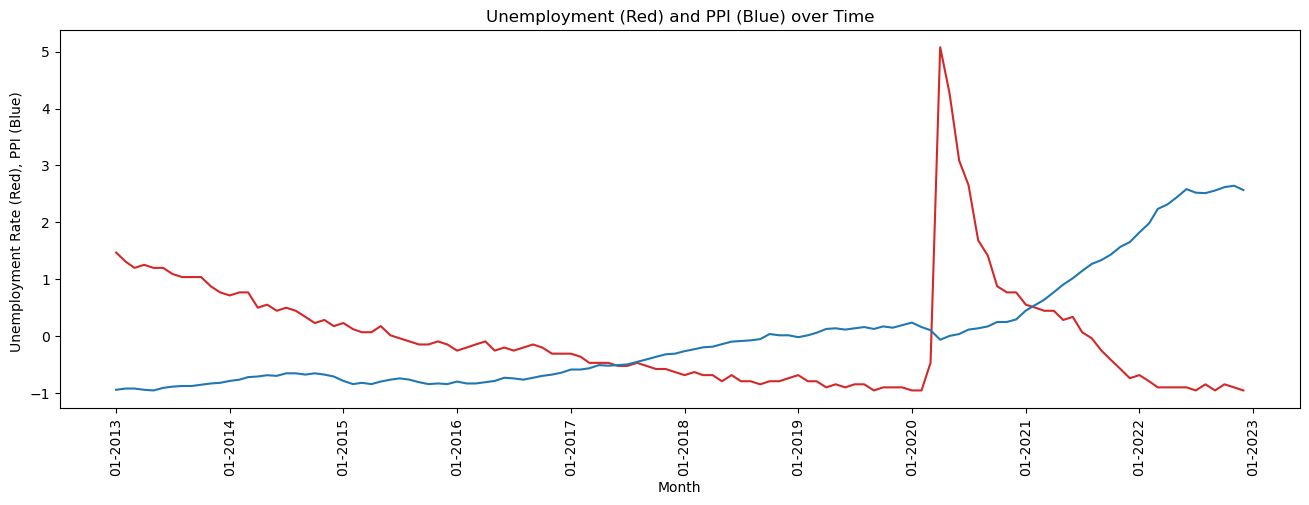

In [59]:
# Plots Unemployment Rate vs PPI
plot_df_double(df, x=df.index, y_1=df.Unemployment_Norm, y_2=df.PPI_Norm, xlabel='Month', ylabel='Unemployment Rate (Red), PPI (Blue) ', title='Unemployment (Red) and PPI (Blue) over Time')

#### What does the relationship between Unemployment and PPI tell us?
The above relationship shows that the Phillips Curve, suggesting an inverse relationship between prices and unemployment, has generally held up since 2013. The period from 2013 to 2020 was characterized by decreasing unemployment and increasing prices. In 2020, at the start of the COVID-19 pandemic, unemployment increased significantly. From mid-2020 to late-2022, prices increased significantly while unemployment dropped to a low level.  
  
The scatterplot below shows that although the inverse relationship between prices and unemployment has held over the last ten years, there have been different levels for each, with prices being relatively low but increasing from 2013 to 2020, and then moving much higher from 2020 onwards.

[Text(0.5, 1.0, 'Earnings and Price Relationship'),
 Text(0, 0.5, 'PPI (Later Years are Darker)')]

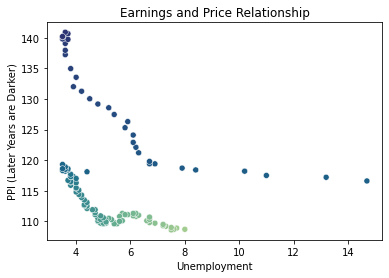

In [60]:
# Create scatterplot of Unemployment vs PPI
sns.color_palette("magma", as_cmap=True)
sns.scatterplot(data=df, x="Unemployment", y="PPI", hue = df.index, palette = 'crest', legend = False).set(title = 'Earnings and Price Relationship', ylabel = "PPI (Later Years are Darker)")

### Relationship between Earnings and PPI

C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


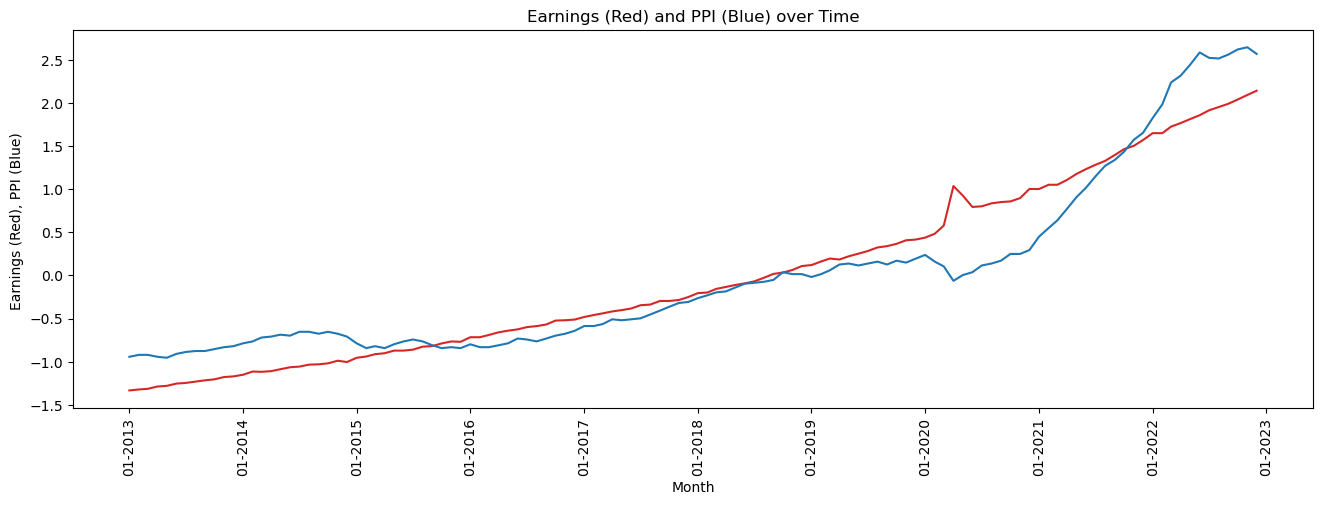

In [61]:
# Plots Average Earnings vs PPI
plot_df_double(df, x=df.index, y_1=df.Earnings_Norm, y_2=df.PPI_Norm, xlabel='Month', ylabel='Earnings (Red), PPI (Blue) ', title='Earnings (Red) and PPI (Blue) over Time')

In [62]:
# Create table of Earnings by Year
df['Year'] = df.index.year
df.info()
table = pd.pivot_table(df,index='Year',values='Earnings',aggfunc={np.min, np.median, np.max})
table

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment       120 non-null    float64
 1   Earnings           120 non-null    float64
 2   PPI                120 non-null    float64
 3   Unemployment_Norm  120 non-null    float64
 4   Earnings_Norm      120 non-null    float64
 5   PPI_Norm           120 non-null    float64
 6   Year               120 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 7.5 KB


,amax,amin,median
Year,,,
2013,24.18,23.75,23.970
2014,24.66,24.23,24.470
2015,25.25,24.75,24.985
2016,25.92,25.38,25.655
2017,26.61,26.00,26.310
2018,27.56,26.73,27.060
2019,28.37,27.59,27.980
2020,30.01,28.43,29.500
2021,31.42,29.92,30.595


#### What does the relationship between Earnings and PPI tell us?
  
One thing that is interesting about the above visualization is the stickiness of wages since 2013. It's not particularly surprising, but I was expecting more variance in averages wages than what exists. Further, I would have expected prices and earnings to have more of a relationship than they do. Even in periods of large swings in prices, wages do not fluctuate drastically. This makes the large jump in earnings even more interesting that occured in 2020.
  
Looking at the graph and the divergence of prices and earnings in 2020, I wonder how much of that can be attributed to people in lower-paying industries like the service sector losing their jobs, leaving higher-paying roles representing a larger proportion of total employment.

#### Visualizing Raw Earnings
Next  I'll visualize the trend in raw earnings over time on its own

C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


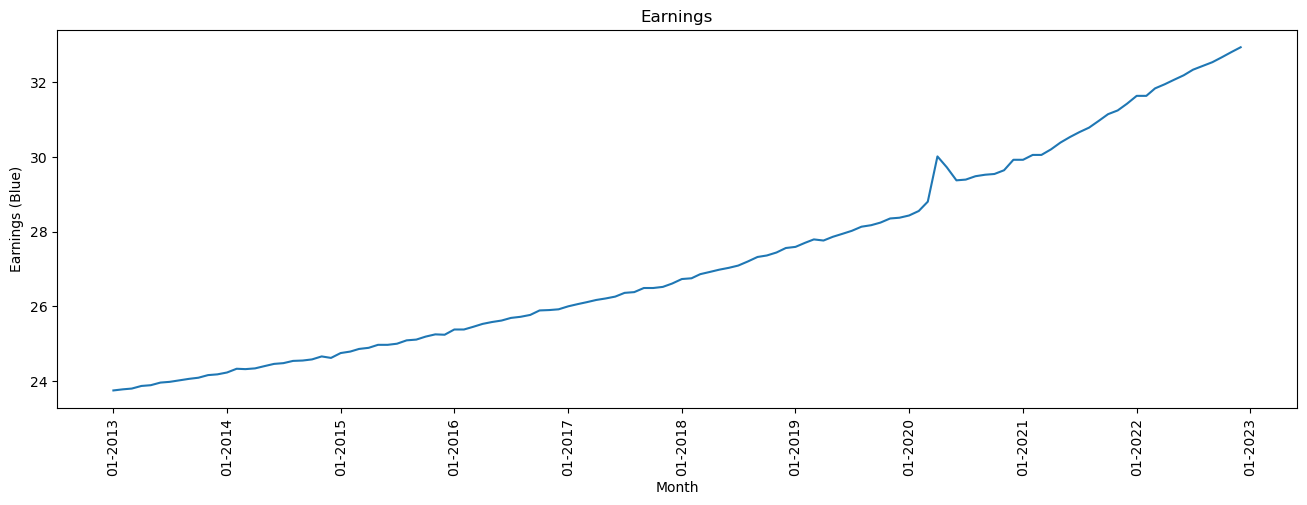

In [63]:
# Plots Earnings
plot_df_single(df, x=df.index, y_1=df.Earnings, xlabel='Month', ylabel='Earnings (Blue)', title='Earnings')

### Relationship between Earnings and Unemployment

C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


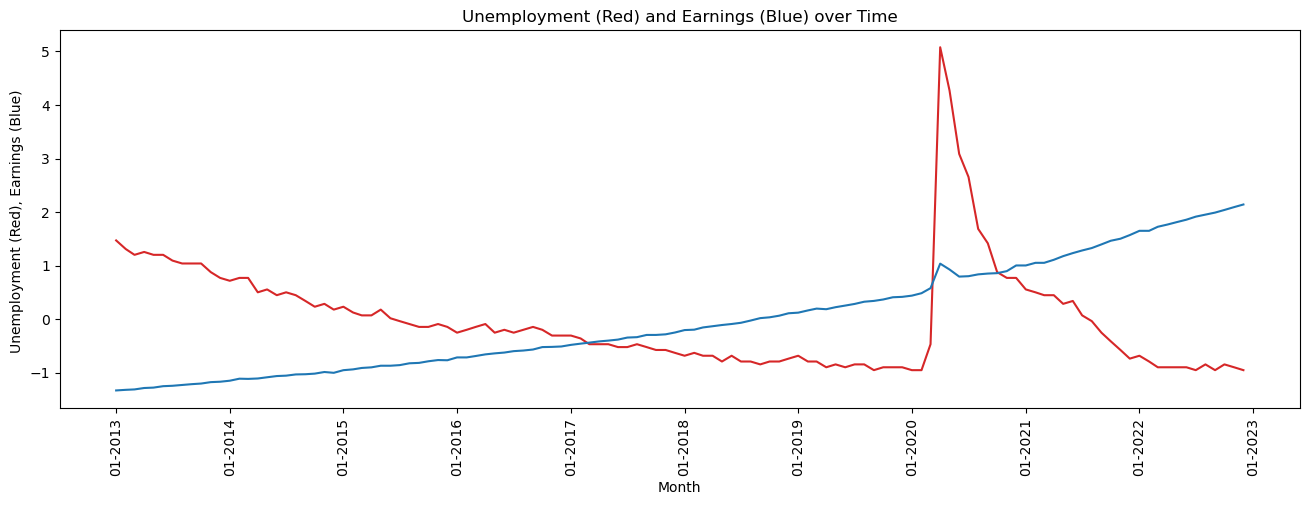

In [49]:
# Plots Unemployment Rate vs Earnings
plot_df_double(df, x=df.index, y_1=df.Unemployment_Norm, y_2=df.Earnings_Norm, xlabel='Month', ylabel='Unemployment (Red), Earnings (Blue) ', title='Unemployment (Red) and Earnings (Blue) over Time')

#### What does the relationship between Earnings and Unemployment tell us?
Typically earnings has moved consistently upward over the last 10 years, although they have increased at a slightly more rapid rate since the start of the COVID-19 pandemic. This is likely due to the inflationary pressure we've seen as a result of the pandemic and quantitative easing programs.

However, there was a period toward the beginning and middle of 2020 where we saw a large jump in unemployment and also a jump in earnings. This is interesting and I would typically not have expected to see this.

Similar to the discussion above when exploring earnings and PPI, I imagine that part of what we're seeing here is that folks in service and other lower-paying jobs were more likely to lose their jobs during the pandemic.

### Concluding Remarks
After analying data on unemployment, earnings and prices over the last ten years, it appears that by in large, these metrics have been in a relatively strong and improving state over time. 

However, in 2020 the COVID-19 Pandemic had a huge impact on unemployment, saw increased earnings and resulted in a combination of supply chain issues and quantitative easing programs that led to much higher prices.

The biggest takeaway for me here is that events like the pandemic often create shocks to common economic measures and can throw traditional economic theory into dissaray.

Studying the dynamics of these measures and others at the time of the pandemic represents an interesting opportunity for further study.